# SMAC/CRISTAL/ULille

Auteur : Philippe Mathieu, CRISTAL Lab, SMAC Team, University of Lille, email : philippe.mathieu@univ-lille.fr

Date : 13 march 2020

## Simulation of epidemics

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from covid import *

In [12]:
couleur_a='#396AB1'
couleur_b='#DA7C30'
dpi=300
figsize = (10,5)

# Un modèle S-I-(G/R)-M

Les infectés se répartissent en Graves et Remis (somme de ces deux taux sensiblement équivalent aux remis de l'ancien modèle). Les Graves finissent soit Remis (taux) soit Morts (1-taux).

In [45]:
data_nat = collecte_donnees()
data_reg = collecte_donnees('regional')
data_dep = collecte_donnees('departemental')

## Evaluation nationale

In [46]:
avant_confinement = data_nat.loc[:'2020-03-16'].shape[0]
renforcement = data_nat.loc[:'2020-03-24'].shape[0]
prolongement = data_nat.loc[:'2020-04-13'].shape[0]
deconfinement = data_nat.loc[:'2020-05-11'].shape[0]
aujourdhui = len(data_nat.index) - 1

In [47]:
I=np.array(data_nat['cas_confirmes']/67000000)
R=np.array(data_nat['gueris']/67000000)
G=np.array(data_nat['reanimation']/67000000)
M=np.array((data_nat['deces'])/67000000)
#M=np.array((data['deces'] + data['deces_ehpad'])/67000000)

S=[1]*len(data_nat.index) - I - G - R - M

data_objectif = np.array([S, I, G, R, M])

periodes_confinement = [avant_confinement, renforcement - avant_confinement, prolongement - renforcement, len(data_nat.index) - prolongement-1]

tauxInfecteInitial = 20 * data_nat['cas_confirmes'][0]/67000000 # Ici on peut modifier pour s'écarter du chiffre officiel initial

L'optimisation peut être lancée à l'aide de la commande suivante:

In [20]:
#solution = optimisation_genetique(500, 1000, data_objectif, periodes_confinement, eval_SIGRM, nb_parametres=2)

Comparaison graphique :

In [21]:
#compare_solution_SIGRM(solution, data_objectif, periodes_confinement)

## Solutions intéressantes

In [53]:
def scenario(listeTaux, category="G", label=None, linestyle='solid', color=couleur_b):
    tauxInfecteInitial = candidat[-5] 
    tauxGraves = candidat[-4]
    tauxRemis = candidat[-3]
    tauxRemisGraves = candidat[-2]
    tauxMortalite = candidat[-1]

    S=[1 - tauxInfecteInitial]
    I=[tauxInfecteInitial]
    G=[0.0]
    R=[0.0]
    M=[0.0]

    liste_taux = []
    i = 0
    for periode in periodes_confinement:
        liste_taux = liste_taux + [candidat[i]] * periode
        i += 1
    SIGRM_increment(S, I, G, R, M, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)
    SIGRM_increment(S, I, G, R, M, listeTaux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)
    if category == "G":
        plt.plot(np.array(G)*67000000, label=label, color=color, linestyle=linestyle)
    if category == "M":
        plt.plot(np.array(M)*67000000, label=label, color=color, linestyle=linestyle)

### Proposition du 06/05

In [48]:
periodes_confinement = [avant_confinement, renforcement - avant_confinement, prolongement - renforcement, deconfinement - prolongement]
candidat=[0.275372335146436, 0.38676389057705435, 0.08906800372536995, 0.10045712354211243, 
          data_nat['cas_confirmes'][0]/67000000, 0.07, 0.07, 0.011445165643347396, 0.06942900452349375]
taux_intermediaire = (candidat[0] + candidat[3])/2

Evolution du R0 :

In [49]:
print(candidat[0] / (candidat[5] + candidat[6]))
print(candidat[1] / (candidat[5] + candidat[6]))
print(candidat[2] / (candidat[5] + candidat[6]))
print(candidat[3] / (candidat[5] + candidat[6]))

1.9669452510459713
2.762599218407531
0.6362000266097853
0.7175508824436602


In [50]:
tauxInfecteInitial = candidat[-5] 
tauxGraves = candidat[-4]
tauxRemis = candidat[-3]
tauxRemisGraves = candidat[-2]
tauxMortalite = candidat[-1]

S=[1 - tauxInfecteInitial]
I=[tauxInfecteInitial]
G=[0.0]
R=[0.0]
M=[0.0]

liste_taux = []
i = 0
for periode in periodes_confinement:
    liste_taux = liste_taux + [candidat[i]] * periode
    i += 1

In [51]:
SIGRM_increment(S, I, G, R, M, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)

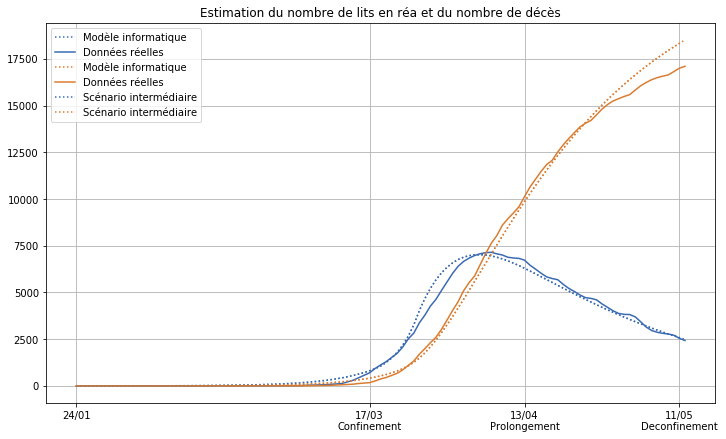

In [60]:
fig, ax = plt.subplots(figsize=(12,7))

plt.plot(np.array(G)*67000000, label="Modèle informatique", color=couleur_a, linestyle=':')
plt.plot(data_objectif[2]*67000000, label="Données réelles", color=couleur_a)
plt.plot(np.array(M)*67000000, label="Modèle informatique", color=couleur_b, linestyle=':')
plt.plot(data_objectif[4]*67000000, label="Données réelles", color=couleur_b)

# Après confinement
scenario([taux_intermediaire]*(aujourdhui - deconfinement), "G", 
         color=couleur_a, label="Scénario intermédiaire", linestyle=':')
scenario([taux_intermediaire]*(aujourdhui - deconfinement), "M", color=couleur_b,
         label="Scénario intermédiaire", linestyle=':')

plt.xticks([0, avant_confinement, prolongement, deconfinement], 
           ('24/01', '17/03\nConfinement', '13/04\nProlongement', '11/05\nDeconfinement'), rotation=0)

plt.title("Estimation du nombre de lits en réa et du nombre de décès")
plt.legend()
plt.grid()